# Additional ressources

* Haykin

# McCulloch-Pitts neuron model

While neural networks developed really quickly recently due to advances in computer hardware, the idea of an artificial neuron goes back to 1943 where McCulloch and Pitts introduced the concept of neural networks as computing machines. They drew parallels with the behaviour of biological neurons to define a general signal processing model that may be used for learning. The model is presented below.

![neuron-model.png](images/neuron-model.png)

The model first make a linear combinations of the inputs:

![equation_v.png](images/equation_v.png)

Then, pass it through a non-linear activation function:

![equation_output.png](images/equation_output.png)

Throughout the tutorials, we will see that there are a wide range of activation functions that can be used (step function, sigmoid, ReLU, ...). Here, it is [the unit step function](https://en.wikipedia.org/wiki/Heaviside_step_function):

![step function](images/equation_step_function.png)

This divide the space in two parts, separated by the line v=0.

![Separate space](images/separate_space.png)

Therefore, by adjusting the weights and bias, the position of the line can be adjusted to separate two categories.
The question is then:

"How do we learn the proper parameters?"

# Rule-based learning: Rosenblatt's perceptron

Blablablabla

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Generate some data

Following the standard notation, `X` is the input data, the location of the data point, and `y` is the thing we want to predict, here the category. 

In [4]:
def gaussian2d(x1, x2, x1_std, x2_std, n):
    X = np.stack((np.random.normal(x1, x1_std, n),
                  np.random.normal(x2, x2_std, n)), axis=1)
    return X

In [7]:
# First Gaussian distribution
X1 = gaussian2d(-5, 5, 3, 1.5, 200)
y1 = np.ones(len(X1))    # First category is 1

# Second distribution
X2 = gaussian2d(10, 10, 3, 3, 200)
y2 = np.ones(len(X2)) * -1   # Second category is -1

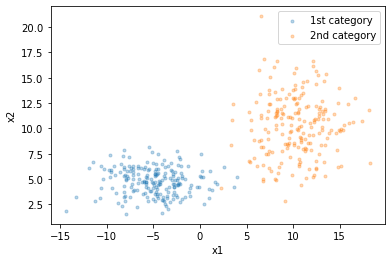

In [11]:
fig1, ax1 = plt.subplots()
ax1.scatter(X1[:, 0], X1[:, 1], marker='.', alpha=0.3, label='1st category')
ax1.scatter(X2[:, 0], X2[:, 1], marker='.', alpha=0.3, label='2nd category')
ax1.set(xlabel='x1', ylabel='x2')
ax1.legend()
plt.show()

We combine the two distributions into a single dataset:

In [13]:
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)

print('Inputs shape:\t{}\nLabel shape:\t{}'.format(X.shape, y.shape))

Inputs shape:	(400, 2)
Label shape:	(400,)


## Update rule

In [16]:
def update_weights(X, y, w, alpha):
    """
    Follows equation 1.3 and 1.6 to update the weight vector w.
    """

    for i in range(len(X)):
        # Define the vector according to the textbook
        x_temp = np.array([[1], [X[i, 0]], [X[i, 1]]]).T

        # Combiner output (Eq. 1.3)
        v = np.matmul(x_temp, w.T)

        # Eq 1.6: weight update
        if (v > 0) and (y[i] == -1):
            w -= alpha * x_temp
        elif (v <= 0) and (y[i] == 1):
            w += alpha * x_temp
    return w

## Training loop

In [17]:
def train(X, y, w, alpha, epochs):
    for i in range(epochs):
        w = update_weights(X, y, w, alpha)
        if i % 100 == 0:
            print("[{} / {}]".format(i, epochs))
    return w

# Training

In [18]:
# Define the vector according to the textbook
w = np.array([[0.0], [0.0], [0.0]]).T
alpha = 1e-4    # Learning rate
epochs = 1000

w = train(X, y, w, alpha, epochs)
w = w.squeeze()

[0 / 1000]
[100 / 1000]
[200 / 1000]
[300 / 1000]
[400 / 1000]
[500 / 1000]
[600 / 1000]
[700 / 1000]
[800 / 1000]
[900 / 1000]


## Final graph

In [19]:
x_plot = np.linspace(-10, 10)
y_plot = -(w[1] * x_plot + w[0]) / w[2]

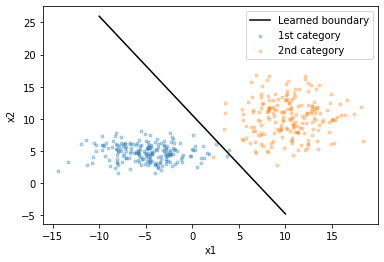

In [21]:
fig2, ax2 = plt.subplots()
ax2.scatter(X1[:, 0], X1[:, 1], marker='.', alpha=0.3, label='1st category')
ax2.scatter(X2[:, 0], X2[:, 1], marker='.', alpha=0.3, label='2nd category')
ax2.plot(x_plot, y_plot, 'k', label='Learned boundary')
ax2.set(xlabel='x1', ylabel='x2')
ax2.legend()
plt.show()